# MS4S10 COURSEWORK 1: 2020/21
## Mark Baber - 17076749
This report will look at exploring a dataset from The Open University, later within the report there will be a section which will look to use unsupervised and supervised models to try and predicting the students who are more likely to fail or withdraw from a module/course.

<br>
This study is being carried out due to the rise of online learning, especially during 2020 when we were all living within a global pandemic due to Covid. Whilst not every student would be able to carry out online learning to their highest potential, with data these patterns could be discovered and improved upon for improved student satisfaction and number of students graduating.

# 1 - Task A

This section will look at:
1. Exploratory data analysis (EDA) of the dataset.
2. Look to create new tables suitable for testing machine learning models.

## 1.0 - Useful hints
<br>
The data is spread into 7 tables and encapsulates plenty of interesting insights. Try to
discover some insights which inform the next steps of the coursework.
Based on the insights, you should be able to apply feature engineering techniques, such as
feature extraction and selection. <br><br>
There should be a trail of informed decisions throughout your coursework and recording
these tasks forms a major part of that trail as such, you should provide informative
comments throughout your code.

In [1]:
# import modules
%matplotlib inline
from matplotlib import cm
from matplotlib import pyplot as plt
from sklearn import metrics, preprocessing, tree
from sklearn.cluster import KMeans, MeanShift, estimate_bandwidth
from sklearn.datasets import make_blobs
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDRegressor
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score,  mean_squared_error, mean_absolute_error, silhouette_samples, silhouette_score
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler as ss
from sklearn.tree import DecisionTreeClassifier
import matplotlib as mpl
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import sklearn

In [2]:
# read in the different datasets
assessment = pd.read_csv('data/assessments.csv')
course = pd.read_csv('data/courses.csv')
stAssessment = pd.read_csv('data/studentAssessment.csv')
stInfo = pd.read_csv('data/studentInfo.csv')
stReg = pd.read_csv('data/studentRegistration.csv')
stVLE = pd.read_csv('data/studentVle.csv') # 10655280 entries! big.
vle = pd.read_csv('data/vle.csv')

## 1.1 - Dataset 1 - Assessment
This section of the report will look at exploring the dataset assessment.

In [3]:
# First lets look at the head
assessment.head()

,code_module,code_presentation,id_assessment,assessment_type,date,weight
0,AAA,2013J,1752,TMA,19.0,10.0
1,AAA,2013J,1753,TMA,54.0,20.0
2,AAA,2013J,1754,TMA,117.0,20.0
3,AAA,2013J,1755,TMA,166.0,20.0
4,AAA,2013J,1756,TMA,215.0,30.0


From first look we can see there are 6 columns:

- ***code_module*** : code to identify the module.

- ***code_presentation*** : code to identify the presentation.

- ***id_assessment*** : code to identify the assessment.

- ***assessment_type*** : type of assessment

- ***date*** : information about the final submission date of the assessment calculated as the number of days since the start of the module-presentation. The starting date of the presentation has number 0 (zero)

- ***weight*** : weight of the assessment in %. Typically, Exams are treated separately and have the weight 100%; the sum of all other assessments is 100%

In [4]:
# Look at the tail
assessment.tail()

,code_module,code_presentation,id_assessment,assessment_type,date,weight
201,GGG,2014J,37443,CMA,229.0,0.0
202,GGG,2014J,37435,TMA,61.0,0.0
203,GGG,2014J,37436,TMA,124.0,0.0
204,GGG,2014J,37437,TMA,173.0,0.0
205,GGG,2014J,37444,Exam,229.0,100.0


In [5]:
# next would be a good idea to check any null values
assessment.info()
# Here we can see there are 11 dates which are null.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   code_module        206 non-null    object 
 1   code_presentation  206 non-null    object 
 2   id_assessment      206 non-null    int64  
 3   assessment_type    206 non-null    object 
 4   date               195 non-null    float64
 5   weight             206 non-null    float64
dtypes: float64(2), int64(1), object(3)
memory usage: 9.8+ KB


In [6]:
# Lets look at the unique values for each column
for col in assessment.columns:
    print(col, "-", len(assessment[col].unique()), "unique values")

code_module - 7 unique values
code_presentation - 4 unique values
id_assessment - 206 unique values
assessment_type - 3 unique values
date - 75 unique values
weight - 24 unique values


In [7]:
# lets try to loop through each unique value as a value (instead of a count)
for col in assessment.columns:
    print(col, "-", len(assessment[col].unique()), assessment[col].unique())

code_module - 7 ['AAA' 'BBB' 'CCC' 'DDD' 'EEE' 'FFF' 'GGG']
code_presentation - 4 ['2013J' '2014J' '2013B' '2014B']
id_assessment - 206 [ 1752  1753  1754  1755  1756  1757  1758  1759  1760  1761  1762  1763
 14991 14992 14993 14994 14995 14984 14985 14986 14987 14988 14989 14990
 15003 15004 15005 15006 15007 14996 14997 14998 14999 15000 15001 15002
 15015 15016 15017 15018 15019 15008 15009 15010 15011 15012 15013 15014
 15020 15021 15022 15023 15024 15025 24286 24287 24288 24289 24282 24283
 24284 24285 24290 40087 24295 24296 24297 24298 24291 24292 24293 24294
 24299 40088 25341 25342 25343 25344 25345 25346 25347 25334 25335 25336
 25337 25338 25339 25340 25348 25349 25350 25351 25352 25353 25354 25355
 25356 25357 25358 25359 25360 25361 25362 25363 25364 25365 25366 25367
 25368 30709 30710 30711 30712 30713 30714 30715 30716 30717 30718 30719
 30720 30721 30722 30723 34865 34866 34867 34868 34869 34871 34870 34860
 34861 34862 34863 34864 34872 34878 34879 34880 34881 34882 

Now to look at the spread of the data, where is the data falling within the whole dataset.

In [8]:
assessment.describe()
# this is missing the objects within the dataset

,id_assessment,date,weight
count,206.000000,195.000000,206.000000
mean,26473.975728,145.005128,20.873786
std,10098.625521,76.001119,30.384224
min,1752.000000,12.000000,0.000000
25%,15023.250000,71.000000,0.000000
50%,25364.500000,152.000000,12.500000
75%,34891.750000,222.000000,24.250000
max,40088.000000,261.000000,100.000000


In [9]:
# add include objects to look at the categorical columns
assessment.describe(include='object')

,code_module,code_presentation,assessment_type
count,206,206,206
unique,7,4,3
top,FFF,2014B,TMA
freq,52,57,106


With this dataset, there isn't much to pull from this dataset as it is (It could be useful if joined with some of the other datasets which will be explored later.)
<br>
<br> 
I also tried to use pandas profiling / profile report but it took up a lot of RAM (16GB) for all 7 datasets.

## 1.2 - Dataset 2 - Course
This section of the report will look at exploring the dataset course.

In [10]:
# Lets start by looking at the head.
course.head()

,code_module,code_presentation,module_presentation_length
0,AAA,2013J,268
1,AAA,2014J,269
2,BBB,2013J,268
3,BBB,2014J,262
4,BBB,2013B,240


From first look of this dataset, here we can see:

- ***code_module*** : code to identify the module.

- ***code_presentation*** : code name of the presentation.

- ***module_presentation_length*** :  length of the module-presentation in days

In [11]:
course.tail()

,code_module,code_presentation,module_presentation_length
17,FFF,2013B,240
18,FFF,2014B,241
19,GGG,2013J,261
20,GGG,2014J,269
21,GGG,2014B,241


In [12]:
course.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 3 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   code_module                 22 non-null     object
 1   code_presentation           22 non-null     object
 2   module_presentation_length  22 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 656.0+ bytes


In [13]:
# Lets look at the unique values for each column
for col in course.columns:
    print(col, "-", len(course[col].unique()), "unique values")

code_module - 7 unique values
code_presentation - 4 unique values
module_presentation_length - 7 unique values


In [14]:
# lets try to loop through each unique value as a value (instead of a count)
for col in course.columns:
    print(col, "-", len(course[col].unique()), course[col].unique())

code_module - 7 ['AAA' 'BBB' 'CCC' 'DDD' 'EEE' 'FFF' 'GGG']
code_presentation - 4 ['2013J' '2014J' '2013B' '2014B']
module_presentation_length - 7 [268 269 262 240 234 241 261]


From first look, we can see 2 / 3 of these columns were within the assessment dataset.<br> Due to this, this section will stop here as there isn't much insight to get from this dataset on it's own.

## 1.3 - Dataset 3 - Student Assessment (stAssessment).
This section of the report will look at exploring the dataset stAssessment.

In [15]:
stAssessment.head()

,id_assessment,id_student,date_submitted,is_banked,score
0,1752,11391,18,0,78.0
1,1752,28400,22,0,70.0
2,1752,31604,17,0,72.0
3,1752,32885,26,0,69.0
4,1752,38053,19,0,79.0


From first look at this dataset:
- ***id_assessment*** : the identification number of the assessment.

- ***id_student*** : a unique identification number for the student.

- ***date_submitted*** : the date of student submission, measured as the number of days since the start of the module presentation.

- ***is_banked*** : a status flag indicating that the assessment result has been transferred from a previous presentation.
   
- ***score*** : the student’s score in this assessment. The range is from 0 to 100. The score lower than 40 is interpreted as Fail. The marks are in the range from 0 to 100.

The main take away from this dataset would be the score, which could be used to look for hidden patterns.
    

In [16]:
stAssessment.tail()

,id_assessment,id_student,date_submitted,is_banked,score
173907,37443,527538,227,0,60.0
173908,37443,534672,229,0,100.0
173909,37443,546286,215,0,80.0
173910,37443,546724,230,0,100.0
173911,37443,558486,224,0,80.0


From first look, it looks like this dataset could be used to see the students scores from their assessments. <br>
This could be used to group students into grade bands.



In [17]:
stAssessment.info()
# the info shows us there are 173 scores with missing values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173912 entries, 0 to 173911
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id_assessment   173912 non-null  int64  
 1   id_student      173912 non-null  int64  
 2   date_submitted  173912 non-null  int64  
 3   is_banked       173912 non-null  int64  
 4   score           173739 non-null  float64
dtypes: float64(1), int64(4)
memory usage: 6.6 MB


In [18]:
# Lets look at the unique values for each column
for col in stAssessment.columns:
    print(col, "-", len(stAssessment[col].unique()), "unique values")

id_assessment - 188 unique values
id_student - 23369 unique values
date_submitted - 312 unique values
is_banked - 2 unique values
score - 102 unique values


In [19]:
# lets try to loop through each unique value as a value (instead of a count)
for col in stAssessment.columns:
    print(col, "-", len(stAssessment[col].unique()), stAssessment[col].unique())

id_assessment - 188 [ 1752  1753  1754  1755  1756  1758  1759  1760  1761  1762 14984 14985
 14986 14987 14988 14989 14991 14992 14993 14994 14995 14996 14997 14998
 14999 15000 15001 15003 15004 15005 15006 15007 15008 15009 15010 15011
 15012 15013 15015 15016 15017 15018 15019 15020 15021 15022 15023 15024
 24282 24283 24284 24285 24286 24287 24288 24289 24290 24291 24292 24293
 24294 24295 24296 24297 24298 24299 25334 25335 25336 25337 25338 25339
 25340 25341 25342 25343 25344 25345 25346 25347 25348 25349 25350 25351
 25352 25353 25354 25355 25356 25357 25358 25359 25360 25361 25362 25363
 25364 25365 25366 25367 25368 30709 30710 30711 30712 30714 30715 30716
 30717 30719 30720 30721 30722 34860 34861 34862 34863 34864 34865 34866
 34867 34868 34869 34870 34871 34873 34874 34875 34876 34877 34878 34879
 34880 34881 34882 34883 34884 34886 34887 34888 34889 34890 34891 34892
 34893 34894 34895 34896 34897 34899 34900 34901 34902 34903 34904 34905
 34906 34907 34908 34909 34910 

From looking at the unique values, here we can see there is quite a lot of data within this dataset which could prove some useful insight into predicting student who withdraw and the students failure rates. <br>
For example, could we see all students who failed with a score <40.

In [20]:
print("NA's for stAssessment \n", stAssessment.isna().sum())
# make a copy
studentAC = stAssessment.copy()
# fill in na's with 0
studentAC.fillna(0, inplace=True)
print(" NA's for studentAC \n", studentAC.isna().sum())

NA's for stAssessment 
 id_assessment       0
id_student          0
date_submitted      0
is_banked           0
score             173
dtype: int64
 NA's for studentAC 
 id_assessment     0
id_student        0
date_submitted    0
is_banked         0
score             0
dtype: int64


In [21]:
# get all of the dataset, but filter the score column 
stFails = studentAC[studentAC["score"] < 40]
# There are 7751 scores which were less than 40.
#print(stFails)
# check for NA's
stFails.isna().sum()

id_assessment     0
id_student        0
date_submitted    0
is_banked         0
score             0
dtype: int64

In [22]:
# Now lets see if there are 7578 unique students who have failed.
stFails['id_student'].unique()
# using a loop, check the unique students who failed
for col in stFails.columns:
    print(col, "-", len(stFails[col].unique()), "unique values")

id_assessment - 183 unique values
id_student - 4967 unique values
date_submitted - 260 unique values
is_banked - 2 unique values
score - 40 unique values


Lets look at the highest 10 and the lowest 10 scores within the dataset

In [23]:
stFailsLow = stFails['score'].sort_values(ascending=True)
stFailsLow.describe()
# With the <40 scores, here we can describe this subset to find the count, mean etc

count    7751.000000
mean       23.269643
std        12.753800
min         0.000000
25%        15.000000
50%        27.000000
75%        34.000000
max        39.000000
Name: score, dtype: float64

<AxesSubplot:title={'center':'Distribution of Scores <40. (NAs = 0)'}, ylabel='Density'>

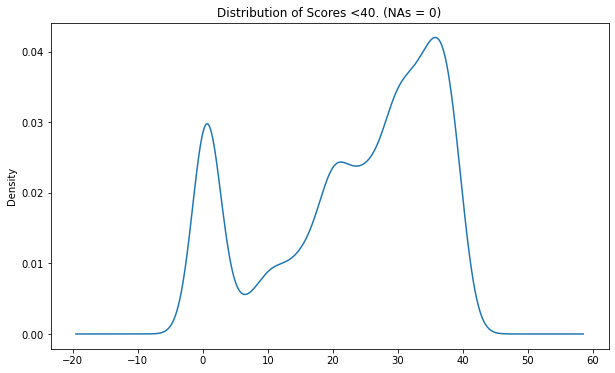

In [24]:
stFailsLow.plot(kind='kde', 
                figsize=(10,6), 
                title='Distribution of Scores <40. (NAs = 0)')

From the distribution plot, here we can see there are a lot of grades between 30+ but really drops down before 40. Whilst this is all grades <40, it is interesting to see where the scores start to fall among the rest of the students.
<br> <br>
There are a lot of 0's, but this is due to all NA's having the value 0.

In [25]:
# get all of the dataset, but filter the score column 
stPass = studentAC[studentAC["score"] >= 40]
# 166161 students passed
print(stPass)
# check for NA's
stPass.isna().sum()

        id_assessment  id_student  date_submitted  is_banked  score
0                1752       11391              18          0   78.0
1                1752       28400              22          0   70.0
2                1752       31604              17          0   72.0
3                1752       32885              26          0   69.0
4                1752       38053              19          0   79.0
...               ...         ...             ...        ...    ...
173907          37443      527538             227          0   60.0
173908          37443      534672             229          0  100.0
173909          37443      546286             215          0   80.0
173910          37443      546724             230          0  100.0
173911          37443      558486             224          0   80.0

[166161 rows x 5 columns]


id_assessment     0
id_student        0
date_submitted    0
is_banked         0
score             0
dtype: int64

In [26]:
# Now lets see if there are 7578 unique students who have failed.
stPass['id_student'].unique()
# using a loop, check the unique students who failed
for col in stPass.columns:
    print(col, "-", len(stPass[col].unique()), "unique values")

id_assessment - 188 unique values
id_student - 22973 unique values
date_submitted - 307 unique values
is_banked - 2 unique values
score - 61 unique values


In [27]:
stPassHigh = stPass['score'].sort_values(ascending=False)
stPassHigh.describe()
# a lot of students scored around the 78 mark - overall most students who passed had a distinction

count    166161.000000
mean         78.171045
std          15.281904
min          40.000000
25%          68.000000
50%          80.000000
75%          90.000000
max         100.000000
Name: score, dtype: float64

<AxesSubplot:title={'center':'Distribution of Scores >= 40. (NAs = 0)'}, ylabel='Density'>

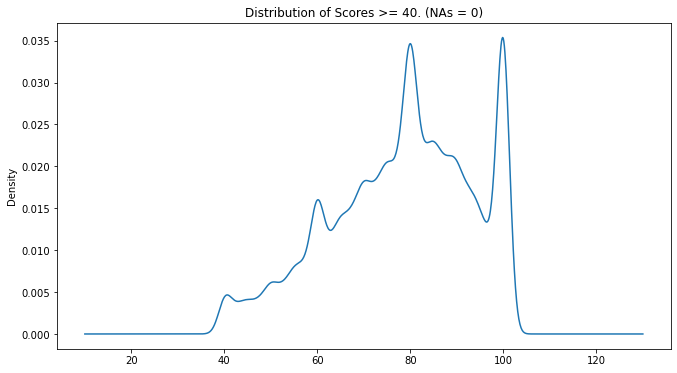

In [28]:
stPassHigh.plot(kind='kde', 
                figsize=(11,6), 
                title='Distribution of Scores >= 40. (NAs = 0)')

From the plot above, it shows there were a lot of marks around 75-80 with a lot of students hovering around the 100 mark

In [29]:
print((stPass['score'] == 100).sum())

18813


There were _18813_ students who scored 100 within the dataset, they were very good students or there was a few mistakes within the dataset. The positive side of me wants to go with good students.

## 1.4 - Dataset 4 - Student Info (stInfo)
This section of the report will look at exploring the dataset stInfo.

In [30]:
stInfo.head()

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass


From first look, this dataset could prove to be the most useful:
- ***code_module*** : An identification code for a module on which the student is registered.

- ***code_presentation*** : The identification code of the presentation during which the student is registered on the module.

- ***id_student*** : A unique identification number for the student.

- ***gender*** : The student’s gender.

- ***region*** : Identifies the geographic region, where the student lived while taking the module-presentation.

- ***highest_education*** : Highest student education level on entry to the module presentation.

- ***imd_band*** : Specifies the Index of Multiple Depravation band of the place where the student lived during the module-presentation.

- ***age_band*** : Band of the student’s age.

- ***num_of_prev_attempts*** : The number times the student has attempted this module.

- ***studied_credits*** : The total number of credits for the modules the student is currently studying.

- ***disability*** : Indicates whether the student has declared a disability

- ***final_result*** : student’s final result in the module-presentation


**This** dataset could also be explored to look at several things:
- Does the region of the student affect the students grade?
- Does the highest level of education affect the students grade?
- Are students with previous attempts getting higher or lower grades?
- Which gender scores higher?
- Does the age affect the grade?
- Do students with a disability score higher than average?

In [31]:
stInfo.tail()

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
32588,GGG,2014J,2640965,F,Wales,Lower Than A Level,10-20,0-35,0,30,N,Fail
32589,GGG,2014J,2645731,F,East Anglian Region,Lower Than A Level,40-50%,35-55,0,30,N,Distinction
32590,GGG,2014J,2648187,F,South Region,A Level or Equivalent,20-30%,0-35,0,30,Y,Pass
32591,GGG,2014J,2679821,F,South East Region,Lower Than A Level,90-100%,35-55,0,30,N,Withdrawn
32592,GGG,2014J,2684003,F,Yorkshire Region,HE Qualification,50-60%,35-55,0,30,N,Distinction


In [32]:
stInfo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   code_module           32593 non-null  object
 1   code_presentation     32593 non-null  object
 2   id_student            32593 non-null  int64 
 3   gender                32593 non-null  object
 4   region                32593 non-null  object
 5   highest_education     32593 non-null  object
 6   imd_band              31482 non-null  object
 7   age_band              32593 non-null  object
 8   num_of_prev_attempts  32593 non-null  int64 
 9   studied_credits       32593 non-null  int64 
 10  disability            32593 non-null  object
 11  final_result          32593 non-null  object
dtypes: int64(3), object(9)
memory usage: 3.0+ MB


In [33]:
stInfo.describe()

,id_student,num_of_prev_attempts,studied_credits
count,3.259300e+04,32593.000000,32593.000000
mean,7.066877e+05,0.163225,79.758691
std,5.491673e+05,0.479758,41.071900
min,3.733000e+03,0.000000,30.000000
25%,5.085730e+05,0.000000,60.000000
50%,5.903100e+05,0.000000,60.000000
75%,6.444530e+05,0.000000,120.000000
max,2.716795e+06,6.000000,655.000000


In [34]:
# add include objects to look at the categorical columns
stInfo.describe(include='object')

,code_module,code_presentation,gender,region,highest_education,imd_band,age_band,disability,final_result
count,32593,32593,32593,32593,32593,31482,32593,32593,32593
unique,7,4,2,13,5,10,3,2,4
top,BBB,2014J,M,Scotland,A Level or Equivalent,20-30%,0-35,N,Pass
freq,7909,11260,17875,3446,14045,3654,22944,29429,12361


In [35]:
# Lets look at the unique values for each column
for col in stInfo.columns:
    print(col, "-", len(stInfo[col].unique()), "unique values")

code_module - 7 unique values
code_presentation - 4 unique values
id_student - 28785 unique values
gender - 2 unique values
region - 13 unique values
highest_education - 5 unique values
imd_band - 11 unique values
age_band - 3 unique values
num_of_prev_attempts - 7 unique values
studied_credits - 61 unique values
disability - 2 unique values
final_result - 4 unique values


In [36]:
# lets try to loop through each unique value as a value (instead of a count)
for col in stInfo.columns:
    print(col, "-", len(stInfo[col].unique()), stInfo[col].unique())

code_module - 7 ['AAA' 'BBB' 'CCC' 'DDD' 'EEE' 'FFF' 'GGG']
code_presentation - 4 ['2013J' '2014J' '2013B' '2014B']
id_student - 28785 [  11391   28400   30268 ... 2648187 2679821 2684003]
gender - 2 ['M' 'F']
region - 13 ['East Anglian Region' 'Scotland' 'North Western Region'
 'South East Region' 'West Midlands Region' 'Wales' 'North Region'
 'South Region' 'Ireland' 'South West Region' 'East Midlands Region'
 'Yorkshire Region' 'London Region']
highest_education - 5 ['HE Qualification' 'A Level or Equivalent' 'Lower Than A Level'
 'Post Graduate Qualification' 'No Formal quals']
imd_band - 11 ['90-100%' '20-30%' '30-40%' '50-60%' '80-90%' '70-80%' nan '60-70%'
 '40-50%' '10-20' '0-10%']
age_band - 3 ['55<=' '35-55' '0-35']
num_of_prev_attempts - 7 [0 1 2 4 3 5 6]
studied_credits - 61 [240  60 120  90 150 180 345 420 170  80  75 300 330 210 270 360 135  70
 225 585 325 130 195 105 655 165 100 390 220 160 250  30  40  45 400 235
 145 630 355  50 110 115  55  85 480 280 175  95 155 190

**A few take aways.**
1. Region has 13 distinct categories.
2. There are more males than females
3. Education has 5 distinct categories.
4. imd_band has 10 distinction categories
5. age_band has 3 distinct categories - This could be improved upon.
6. 7 distinct number of previous attempts, from 0 to 6
7. 2 distinct categories for disability.
8. 4 distinct categories for final result.

#### Dealing with Categorical data
Some of these categorical columns could be useful to plot, this subsection will look at converting some of these columns which will allow plotting. <br>Start with looking at:
- Age
- Disability
- Education
- Gender
- IMD_Band
- Region

In [37]:
# print the unique categorical columns
print("age_band -" ,stInfo['age_band'].unique())
print("disability -" ,stInfo['disability'].unique())
print("highest_education -" ,stInfo['highest_education'].unique())
print("gender -" ,stInfo['gender'].unique())
print("imd_band -" ,stInfo['imd_band'].unique())
print("region -" ,stInfo['region'].unique())

age_band - ['55<=' '35-55' '0-35']
disability - ['N' 'Y']
highest_education - ['HE Qualification' 'A Level or Equivalent' 'Lower Than A Level'
 'Post Graduate Qualification' 'No Formal quals']
gender - ['M' 'F']
imd_band - ['90-100%' '20-30%' '30-40%' '50-60%' '80-90%' '70-80%' nan '60-70%'
 '40-50%' '10-20' '0-10%']
region - ['East Anglian Region' 'Scotland' 'North Western Region'
 'South East Region' 'West Midlands Region' 'Wales' 'North Region'
 'South Region' 'Ireland' 'South West Region' 'East Midlands Region'
 'Yorkshire Region' 'London Region']


In [38]:
# create a copy
stInfoC = stInfo.copy()

Before changing the categories, lets look at trying to plot the data with the counts of entries for each.

In [39]:
# lets get the age band, count entries in age band and merge them.
# group the ages
age = stInfoC.groupby(['age_band'],as_index = False)
# count the grouped age bands
ageCount = age['id_student'].count()
# group gender and final results
resultAge = stInfoC.groupby(['age_band', 'final_result'],as_index = False)
# count the results by gender
resultAgeCount = resultAge['id_student'].count()

# now to merge them
# create a merge df
ageMerge = pd.merge(ageCount, resultAgeCount, on ='age_band', how='inner')
# create an index
ageMerge['i'] = round((ageMerge['id_student_y']/ageMerge['id_student_x']), 2)
# merge gender, results and count
ageMerge = ageMerge[['age_band','final_result', 'i']]
print(ageMerge)

   age_band final_result     i
0      0-35  Distinction  0.08
1      0-35         Fail  0.23
2      0-35         Pass  0.37
3      0-35    Withdrawn  0.32
4     35-55  Distinction  0.12
5     35-55         Fail  0.19
6     35-55         Pass  0.40
7     35-55    Withdrawn  0.29
8      55<=  Distinction  0.19
9      55<=         Fail  0.13
10     55<=         Pass  0.43
11     55<=    Withdrawn  0.25


In [40]:
# lets get the students with a disability, count them and merge them.
# group the students
dis = stInfoC.groupby(['disability'],as_index = False)
# count the grouped genders
disCount = dis['id_student'].count()
# group gender and final results
resultDis = stInfoC.groupby(['disability', 'final_result'],as_index = False)
# count the results by gender
resultDisCount = resultDis['id_student'].count()

# now to merge them
# create a merge df
disMerge = pd.merge(disCount, resultDisCount, on ='disability', how='left')
# create an index
disMerge['i'] = round((disMerge['id_student_y']/disMerge['id_student_x']), 2)
# merge gender, results and count
disMerge = disMerge[['disability','final_result', 'i']]
print(disMerge)

  disability final_result     i
0          N  Distinction  0.10
1          N         Fail  0.22
2          N         Pass  0.39
3          N    Withdrawn  0.30
4          Y  Distinction  0.07
5          Y         Fail  0.23
6          Y         Pass  0.31
7          Y    Withdrawn  0.39


In [41]:
# lets get the highest_education, count of highest_education and merge them.
# group the education
edu = stInfoC.groupby(['highest_education'],as_index = False)
# count the grouped genders
eduCount = edu['id_student'].count()
# group gender and final results
resultEdu = stInfoC.groupby(['highest_education', 'final_result'],as_index = False)
# count the results by gender
resultEduCount = resultEdu['id_student'].count()

# now to merge them
# create a merge df
eduMerge = pd.merge(eduCount, resultEduCount, on ='highest_education', how='left')
# create an index
eduMerge['i'] = round((eduMerge['id_student_y']/eduMerge['id_student_x']), 2)
# merge gender, results and count
eduMerge = eduMerge[['highest_education','final_result', 'i']]
print(eduMerge)

              highest_education final_result     i
0         A Level or Equivalent  Distinction  0.11
1         A Level or Equivalent         Fail  0.19
2         A Level or Equivalent         Pass  0.41
3         A Level or Equivalent    Withdrawn  0.29
4              HE Qualification  Distinction  0.15
5              HE Qualification         Fail  0.17
6              HE Qualification         Pass  0.41
7              HE Qualification    Withdrawn  0.27
8            Lower Than A Level  Distinction  0.06
9            Lower Than A Level         Fail  0.26
10           Lower Than A Level         Pass  0.33
11           Lower Than A Level    Withdrawn  0.35
12              No Formal quals  Distinction  0.05
13              No Formal quals         Fail  0.27
14              No Formal quals         Pass  0.25
15              No Formal quals    Withdrawn  0.43
16  Post Graduate Qualification  Distinction  0.28
17  Post Graduate Qualification         Fail  0.11
18  Post Graduate Qualification

In [42]:
# lets get the genders, count of gender and merge them.
# group the genders
gender = stInfoC.groupby(['gender'],as_index = False)
# count the grouped genders
genderCount = gender['id_student'].count()
# group gender and final results
resultGender = stInfoC.groupby(['gender', 'final_result'],as_index = False)
# count the results by gender
resultGenderCount = resultGender['id_student'].count()

# now to merge them
# create a merge df
genMerge = pd.merge(genderCount, resultGenderCount, on ='gender', how='left')
# create an index
genMerge['i'] = round((genMerge['id_student_y']/genMerge['id_student_x']), 2)
# merge gender, results and count
genMerge = genMerge[['gender','final_result', 'i']]
print(genMerge)

  gender final_result     i
0      F  Distinction  0.09
1      F         Fail  0.21
2      F         Pass  0.39
3      F    Withdrawn  0.30
4      M  Distinction  0.09
5      M         Fail  0.22
6      M         Pass  0.37
7      M    Withdrawn  0.32


In [43]:
# lets get the imd_band, count imd_bands and merge them.
# group the imd_band
imd = stInfoC.groupby(['imd_band'],as_index = False)
# count the grouped imd_band
imdCount = imd['id_student'].count()
# group imd_band and final results
resultImd = stInfoC.groupby(['imd_band', 'final_result'],as_index = False)
# count the results by imd_band
resultImdCount = resultImd['id_student'].count()

# now to merge them
# create a merge df
imdMerge = pd.merge(imdCount, resultImdCount, on ='imd_band', how='left')
# create an index
imdMerge['i'] = round((imdMerge['id_student_y']/imdMerge['id_student_x']), 2)
# merge imd_band, results and count
imdMerge = imdMerge[['imd_band','final_result', 'i']]
print(imdMerge)

   imd_band final_result     i
0     0-10%  Distinction  0.05
1     0-10%         Fail  0.28
2     0-10%         Pass  0.30
3     0-10%    Withdrawn  0.37
4     10-20  Distinction  0.05
5     10-20         Fail  0.26
6     10-20         Pass  0.33
7     10-20    Withdrawn  0.35
8    20-30%  Distinction  0.07
9    20-30%         Fail  0.23
10   20-30%         Pass  0.34
11   20-30%    Withdrawn  0.36
12   30-40%  Distinction  0.09
13   30-40%         Fail  0.22
14   30-40%         Pass  0.38
15   30-40%    Withdrawn  0.31
16   40-50%  Distinction  0.09
17   40-50%         Fail  0.21
18   40-50%         Pass  0.38
19   40-50%    Withdrawn  0.32
20   50-60%  Distinction  0.10
21   50-60%         Fail  0.22
22   50-60%         Pass  0.39
23   50-60%    Withdrawn  0.29
24   60-70%  Distinction  0.10
25   60-70%         Fail  0.19
26   60-70%         Pass  0.42
27   60-70%    Withdrawn  0.30
28   70-80%  Distinction  0.11
29   70-80%         Fail  0.21
30   70-80%         Pass  0.41
31   70-

In [44]:
# lets get the regions, count of number of students per region and merge them.
# group the region
region = stInfoC.groupby(['region'],as_index = False)
# count the grouped genders
regionCount = region['id_student'].count()
# group gender and final results
resultRegion = stInfoC.groupby(['region', 'final_result'],as_index = False)
# count the results by region
resultRegionCount = resultRegion['id_student'].count()

# now to merge them
# create a merge df
regMerge = pd.merge(regionCount, resultRegionCount, on ='region', how='left')
# create an index
regMerge['i'] = round((regMerge['id_student_y']/regMerge['id_student_x']), 2)
# merge gender, results and count
regMerge = regMerge[['region','final_result', 'i']]
print(regMerge)

                  region final_result     i
0    East Anglian Region  Distinction  0.10
1    East Anglian Region         Fail  0.21
2    East Anglian Region         Pass  0.39
3    East Anglian Region    Withdrawn  0.30
4   East Midlands Region  Distinction  0.08
5   East Midlands Region         Fail  0.20
6   East Midlands Region         Pass  0.37
7   East Midlands Region    Withdrawn  0.35
8                Ireland  Distinction  0.08
9                Ireland         Fail  0.22
10               Ireland         Pass  0.47
11               Ireland    Withdrawn  0.23
12         London Region  Distinction  0.08
13         London Region         Fail  0.23
14         London Region         Pass  0.34
15         London Region    Withdrawn  0.35
16          North Region  Distinction  0.13
17          North Region         Fail  0.18
18          North Region         Pass  0.38
19          North Region    Withdrawn  0.32
20  North Western Region  Distinction  0.07
21  North Western Region        

In [45]:
ageCount = stInfoC['age_band'].value_counts()
disabilityCount = stInfoC['disability'].value_counts()
eduCount = stInfoC['highest_education'].value_counts()
imdCount = stInfoC['imd_band'].value_counts()
regionCount = stInfoC['region'].value_counts()

These values could be printed, but it would be easier to plot.

<AxesSubplot:xlabel='final_result', ylabel='i'>

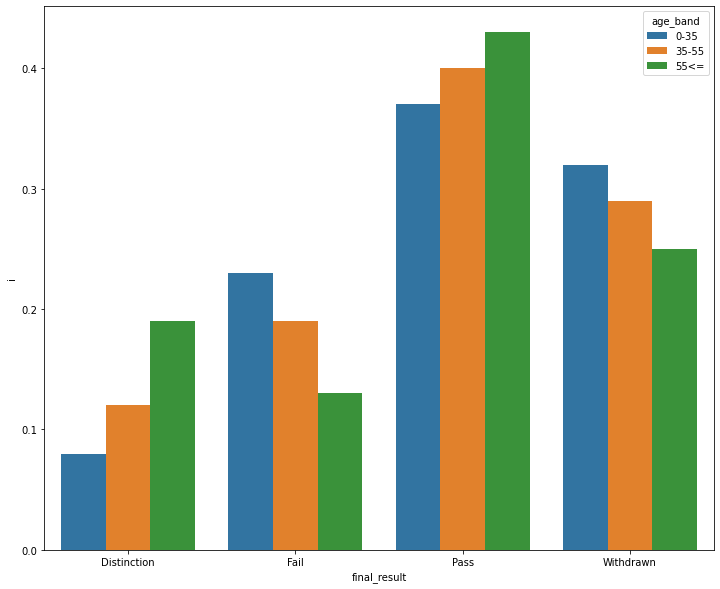

In [46]:
# set fig size
sns.set_context({"figure.figsize": (12, 10)})
# plot age
sns.barplot(data=ageMerge, x='final_result', y='i', hue="age_band")

<AxesSubplot:xlabel='final_result', ylabel='i'>

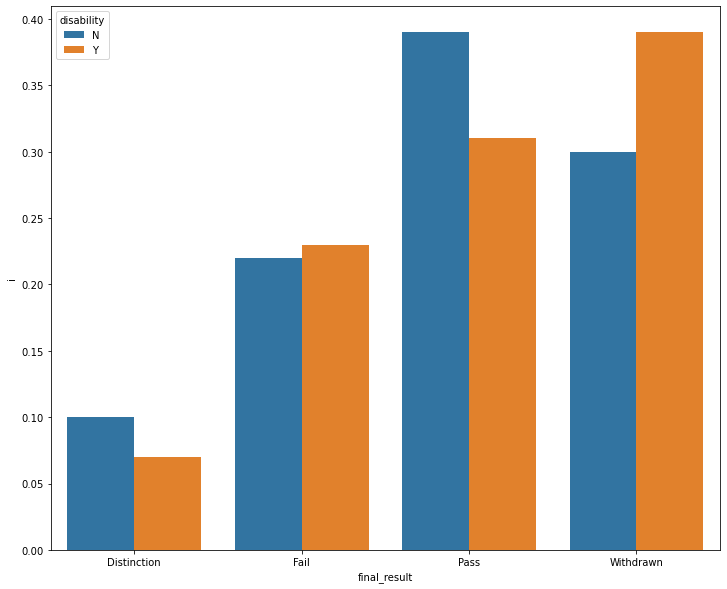

In [47]:
sns.barplot(data=disMerge, x='final_result', y='i', hue="disability")

<AxesSubplot:xlabel='final_result', ylabel='i'>

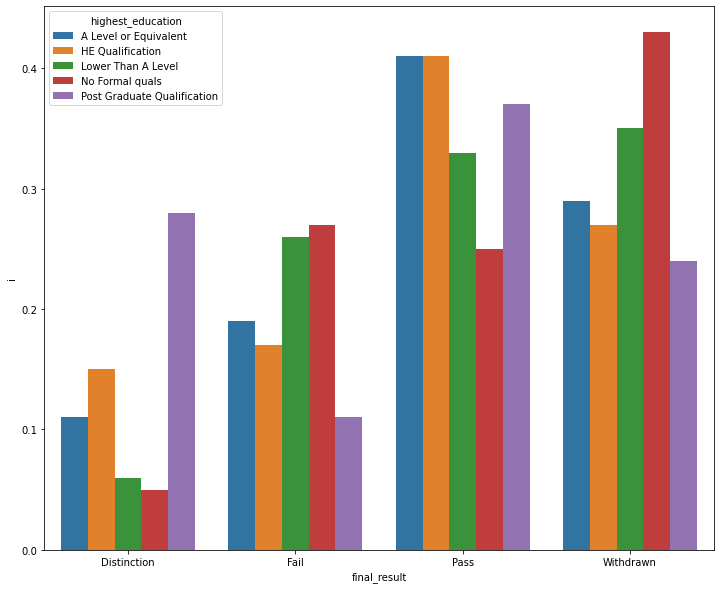

In [48]:
sns.barplot(data=eduMerge, x='final_result', y='i', hue="highest_education")

<AxesSubplot:xlabel='final_result', ylabel='i'>

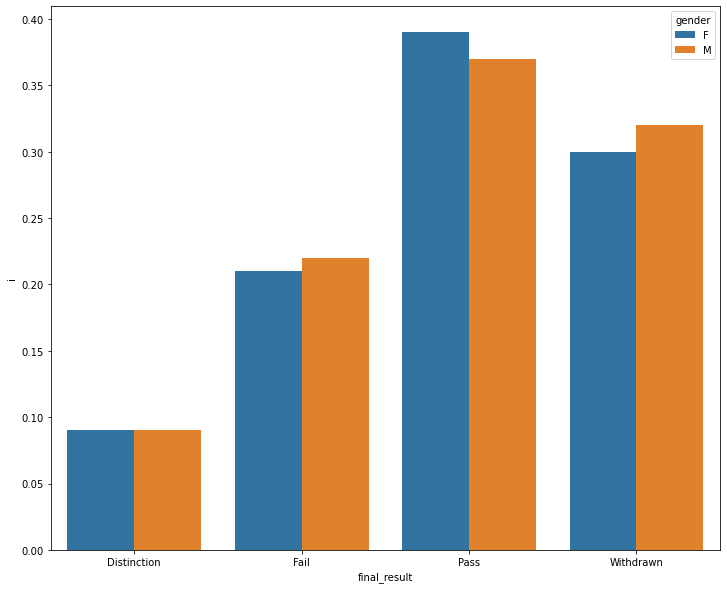

In [49]:
sns.barplot(data=genMerge, x='final_result', y='i', hue="gender")

<AxesSubplot:xlabel='final_result', ylabel='i'>

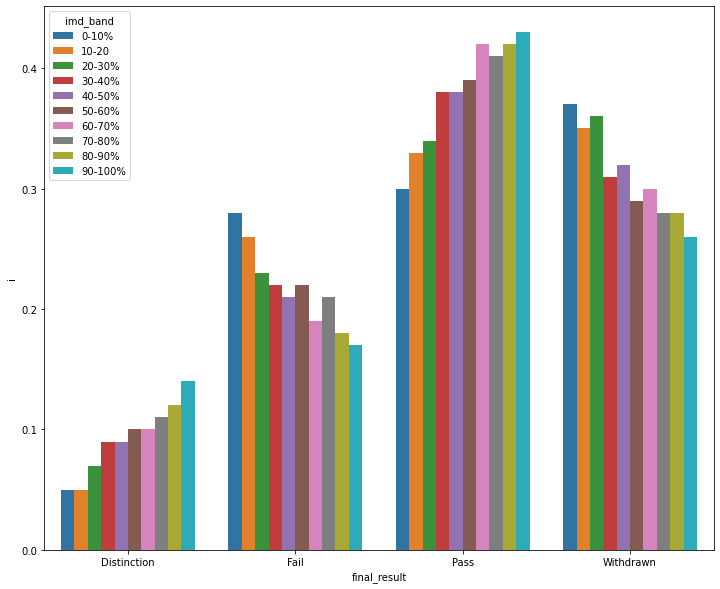

In [50]:
sns.barplot(data=imdMerge, x='final_result', y='i', hue="imd_band")

<AxesSubplot:xlabel='final_result', ylabel='i'>

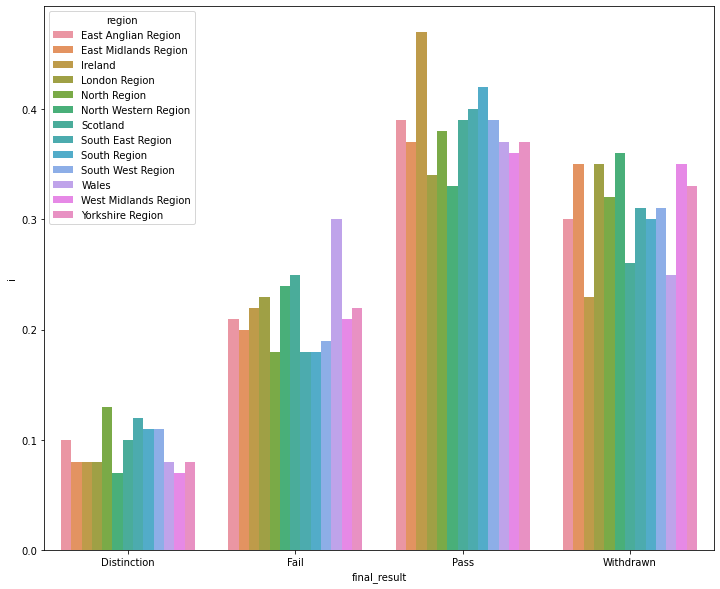

In [51]:
# plot the region
sns.barplot(data=regMerge, x='final_result', y='i', hue="region")

## 1.5 - Dataset 5 - Student Registration (stReg)
This section will look at the dataset stReg.

In [52]:
stReg.head()

,code_module,code_presentation,id_student,date_registration,date_unregistration
0,AAA,2013J,11391,-159.0,NaN
1,AAA,2013J,28400,-53.0,NaN
2,AAA,2013J,30268,-92.0,12.0
3,AAA,2013J,31604,-52.0,NaN
4,AAA,2013J,32885,-176.0,NaN


From first look of the dataset:
- ***code_module*** : an identification code for a module

- ***code_presentation*** : The identification code of the presentation

- ***id_student*** : a unique identification number for the student

- ***date_registration*** : The date of a student’s registration on the module presentation, as number of days from start of module.
   
- ***date_unregistration*** : The date of when a student unregistered from the module, this is measured as number of days.

In [53]:
stReg.tail()

,code_module,code_presentation,id_student,date_registration,date_unregistration
32588,GGG,2014J,2640965,-4.0,NaN
32589,GGG,2014J,2645731,-23.0,NaN
32590,GGG,2014J,2648187,-129.0,NaN
32591,GGG,2014J,2679821,-49.0,101.0
32592,GGG,2014J,2684003,-28.0,NaN


In [54]:
stReg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   code_module          32593 non-null  object 
 1   code_presentation    32593 non-null  object 
 2   id_student           32593 non-null  int64  
 3   date_registration    32548 non-null  float64
 4   date_unregistration  10072 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 1.2+ MB


In [55]:
# Lets look at the unique values for each column
for col in stReg.columns:
    print(col, "-", len(stReg[col].unique()), "unique values")

code_module - 7 unique values
code_presentation - 4 unique values
id_student - 28785 unique values
date_registration - 333 unique values
date_unregistration - 417 unique values


In [56]:
stReg.describe()

,id_student,date_registration,date_unregistration
count,3.259300e+04,32548.000000,10072.000000
mean,7.066877e+05,-69.411300,49.757645
std,5.491673e+05,49.260522,82.460890
min,3.733000e+03,-322.000000,-365.000000
25%,5.085730e+05,-100.000000,-2.000000
50%,5.903100e+05,-57.000000,27.000000
75%,6.444530e+05,-29.000000,109.000000
max,2.716795e+06,167.000000,444.000000


In [57]:
stReg.describe(include='object')

,code_module,code_presentation
count,32593,32593
unique,7,4
top,BBB,2014J
freq,7909,11260


From first look, nothing about this dataset jumps out to me. Maybe looking at which module is the most popular.


In [58]:
codeCount = stReg['code_module'].value_counts()
# Print the code module with the number of students on the course.
print(codeCount.sort_values(ascending=False))

BBB    7909
FFF    7762
DDD    6272
CCC    4434
EEE    2934
GGG    2534
AAA     748
Name: code_module, dtype: int64


From the code_module being counted and sorted, here the results show the course mode BBB has the highest student count, with the module AAA having the lowest count.

## 1.6 - Dataset 6 - Student VLE (stVLE)
This section will look at the dataset stReg.

In [59]:
stVLE.head()

,code_module,code_presentation,id_student,id_site,date,sum_click
0,AAA,2013J,28400,546652,-10,4
1,AAA,2013J,28400,546652,-10,1
2,AAA,2013J,28400,546652,-10,1
3,AAA,2013J,28400,546614,-10,11
4,AAA,2013J,28400,546714,-10,1


First look at the dataset:
- ***code_module***: an identification code for a module

- ***code_presentation*** : the identification code of the module presentation

- ***id_student*** : a unique identification number for the student

- ***id_site*** : an identification number for the VLE material

- ***date (Days)*** : the date of student’s interaction with the material measured as the number of days since the start of the module-presentation

- ***sum_click*** : the number of times a student interacts with the material in that day

The first thing to stand out for me, is the date and clicks.
- date: number of days since student interacted with material
- sum_click: the number of times a student interacts with material per day

Joining this dataset to student info could allow the use of filtering the data, and seeing if more interaction can lead a higher grade. Another hypothesis worth testing could be: 
- does consistent interaction with material lead to a higher grade.

In [60]:
stVLE.tail()

,code_module,code_presentation,id_student,id_site,date,sum_click
10655275,GGG,2014J,675811,896943,269,3
10655276,GGG,2014J,675578,896943,269,1
10655277,GGG,2014J,654064,896943,269,3
10655278,GGG,2014J,654064,896939,269,1
10655279,GGG,2014J,654064,896939,269,1


In [61]:
stVLE.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10655280 entries, 0 to 10655279
Data columns (total 6 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   code_module        object
 1   code_presentation  object
 2   id_student         int64 
 3   id_site            int64 
 4   date               int64 
 5   sum_click          int64 
dtypes: int64(4), object(2)
memory usage: 487.8+ MB


In [62]:
# Lets look at the unique values for each column
for col in stVLE.columns:
    print(col, "-", len(stVLE[col].unique()), "unique values")

code_module - 7 unique values
code_presentation - 4 unique values
id_student - 26074 unique values
id_site - 6268 unique values
date - 295 unique values
sum_click - 498 unique values


In [63]:
stVLE.describe()

,id_student,id_site,date,sum_click
count,1.065528e+07,1.065528e+07,1.065528e+07,1.065528e+07
mean,7.333336e+05,7.383234e+05,9.517400e+01,3.716946e+00
std,5.827060e+05,1.312196e+05,7.607130e+01,8.849047e+00
min,6.516000e+03,5.267210e+05,-2.500000e+01,1.000000e+00
25%,5.077430e+05,6.735190e+05,2.500000e+01,1.000000e+00
50%,5.882360e+05,7.300690e+05,8.600000e+01,2.000000e+00
75%,6.464840e+05,8.770300e+05,1.560000e+02,3.000000e+00
max,2.698588e+06,1.049562e+06,2.690000e+02,6.977000e+03


In [64]:
stVLE.isna().sum()

code_module          0
code_presentation    0
id_student           0
id_site              0
date                 0
sum_click            0
dtype: int64

This dataset seems to have no missing values which is nice, it should also be easy to join this dataset to a different dataset for some additional analysis.

## 1.7 - Dataset 7 - VLE (vle)
This section will look at the dataset stReg.

In [65]:
vle.head()

,id_site,code_module,code_presentation,activity_type,week_from,week_to
0,546943,AAA,2013J,resource,NaN,NaN
1,546712,AAA,2013J,oucontent,NaN,NaN
2,546998,AAA,2013J,resource,NaN,NaN
3,546888,AAA,2013J,url,NaN,NaN
4,547035,AAA,2013J,resource,NaN,NaN


From first look of this dataset, we can see:
- ***id_site*** : an identification number of the material

- ***code_module*** : an identification code for module

- ***code_presentation*** : the identification code of presentation

- ***activity_type*** : the role associated with the module material

- ***week_from*** : the week from which the material is planned to be used

- ***week_to*** : week until which the material is planned to be used

In [66]:
vle.tail()

,id_site,code_module,code_presentation,activity_type,week_from,week_to
6359,897063,GGG,2014J,resource,NaN,NaN
6360,897109,GGG,2014J,resource,NaN,NaN
6361,896965,GGG,2014J,oucontent,NaN,NaN
6362,897060,GGG,2014J,resource,NaN,NaN
6363,897100,GGG,2014J,resource,NaN,NaN


In [67]:
vle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6364 entries, 0 to 6363
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id_site            6364 non-null   int64  
 1   code_module        6364 non-null   object 
 2   code_presentation  6364 non-null   object 
 3   activity_type      6364 non-null   object 
 4   week_from          1121 non-null   float64
 5   week_to            1121 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 298.4+ KB


From the info of vle, we can see there are a lot of missing values for the dates (Week from - week to). This could be due to term times and breaks throughout the year.

In [68]:
# Lets look at the unique values for each column
for col in vle.columns:
    print(col, "-", len(vle[col].unique()), "unique values")

id_site - 6364 unique values
code_module - 7 unique values
code_presentation - 4 unique values
activity_type - 20 unique values
week_from - 31 unique values
week_to - 31 unique values


In [69]:
vle.describe()

,id_site,week_from,week_to
count,6.364000e+03,1121.000000,1121.000000
mean,7.260991e+05,15.204282,15.214987
std,1.283151e+05,8.792865,8.779806
min,5.267210e+05,0.000000,0.000000
25%,6.615928e+05,8.000000,8.000000
50%,7.300965e+05,15.000000,15.000000
75%,8.140162e+05,22.000000,22.000000
max,1.077905e+06,29.000000,29.000000


Describe doesn't really show anything useful here, but was still worth showing this. 
<br> <br>
This section looked at the exploratory data analysis of each 'table' within the whole dataset, with a few things which stood out especially within student info which was explored with a few plots. 
<br>
The next section will look at combining a few tables and running some unsupervised analysis on the table.

## 1.8 - New Features

This section will look at creating a dataset which can be used to predict the students who are more likely to withdraw/fail. Something which stands out for me would be the sum_clicks (number of interactions) and final results.

In [70]:
# sum_clicks is within stVLE
# final_result is within stInfo
studentInt = pd.DataFrame()
studentIntFo = pd.DataFrame()

In [71]:
stClicker = stVLE.groupby(['id_student', 'code_module', 'code_presentation']).agg({'sum_click':['mean','sum']})
stClicker.reset_index(level=[0,1,2], inplace=True)
stClicker.columns = ['id_student', 'code_module', 'code_presentation', 'mean_clicks', 'sum_clicks']

In [72]:
# merging stClicker with stCourseInf
stCourseInf = pd.merge(stInfo, stClicker, how='left', left_on=['id_student', 'code_module', 'code_presentation'],right_on=['id_student', 'code_module', 'code_presentation'])
stCourseInf = stCourseInf[['code_module','code_presentation','id_student','gender','region','highest_education','imd_band','age_band','num_of_prev_attempts','studied_credits','disability','mean_clicks','sum_clicks','final_result']]
stCourseInf.reset_index(level=[0], inplace=True)

In [73]:
stCourseInf.head()

,index,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,mean_clicks,sum_clicks,final_result
0,0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,4.765306,934.0,Pass
1,1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,3.337209,1435.0,Pass
2,2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,3.697368,281.0,Withdrawn
3,3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,3.254902,2158.0,Pass
4,4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,2.937500,1034.0,Pass


<Figure size 1440x864 with 0 Axes>

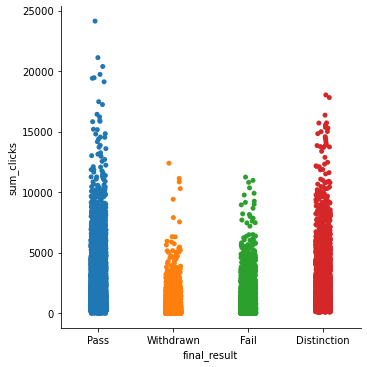

In [74]:
plt.figure(figsize=(20,12))

#sns.violinplot(x='final_result', y = 'sum_clicks', data = studentIntFo)
# violinplot not very good.

sns.catplot(x='final_result', 
            y = 'sum_clicks', 
            data = stCourseInf)
# show the plot.
plt.show()

## 1.9 - Data Cleaning
This section we will clean the datasets, this involved removing categorical values with numbers. This can be done manually in multiple ways, with mapping, OneHotEncoding or LabelEncoders. <br>

In [75]:
# combine stAss, stInfo, stReg
myDf = stCourseInf.copy()
myDf.head()

,index,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,mean_clicks,sum_clicks,final_result
0,0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,4.765306,934.0,Pass
1,1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,3.337209,1435.0,Pass
2,2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,3.697368,281.0,Withdrawn
3,3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,3.254902,2158.0,Pass
4,4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,2.937500,1034.0,Pass


In [76]:
myDf['final_result'].value_counts()

Pass           12361
Withdrawn      10156
Fail            7052
Distinction     3024
Name: final_result, dtype: int64

In [77]:
# remove na's and count again
myDf.dropna(inplace=True)
myDf['final_result'].value_counts()

Pass           11827
Withdrawn       6985
Fail            6537
Distinction     2825
Name: final_result, dtype: int64

In [78]:
myDf.head()

,index,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,mean_clicks,sum_clicks,final_result
0,0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,4.765306,934.0,Pass
1,1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,3.337209,1435.0,Pass
2,2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,3.697368,281.0,Withdrawn
3,3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,3.254902,2158.0,Pass
4,4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,2.937500,1034.0,Pass


In [79]:
# get a copy
myTemp = myDf.copy()
# start preprocessing categories to numbers
le = preprocessing.LabelEncoder()

In [80]:
# cols to transform

# code_module
myTemp['code_module']= le.fit_transform(myTemp['code_module'])
# print('Code modules \n ', myTemp['code_module_x'].unique())

# code_presentation
myTemp['code_presentation']= le.fit_transform(myTemp['code_presentation'])
# print('Code Presentation \n', myTemp['code_presentation_x'].unique())

# gender
myTemp['gender']= le.fit_transform(myTemp['gender'])
# print('gender \n', myTemp['gender'].unique())

#region
myTemp['region']= le.fit_transform(myTemp['region'])
# print('region \n', myTemp['region'].unique())

#highest_education
myTemp['highest_education']= le.fit_transform(myTemp['highest_education'])
# print('highest_education \n', myTemp['highest_education'].unique())

# imd_band
myTemp['imd_band'] = myTemp['imd_band']
myTemp['imd_band'] = myTemp['imd_band'].astype("category").cat.codes
myTemp['imd_band'].head

#age_band
myTemp['age_band']= le.fit_transform(myTemp['age_band'])
# print('highest_education \n', myTemp['highest_education'].unique())

#final_result
myTemp['final_result']= le.fit_transform(myTemp['final_result'])
# print('final_result \n', myTemp['final_result'].unique())

# disability
myTemp['disability']= le.fit_transform(myTemp['disability'])
# print('code_presentation_y \n', myTemp['code_presentation_y'].unique())

In [81]:
for col in myTemp.columns:
    print(col, "-", len(myTemp[col].unique()), myTemp[col].unique())

index - 28174 [    0     1     2 ... 32590 32591 32592]
code_module - 7 [0 1 2 3 4 5 6]
code_presentation - 4 [1 3 0 2]
id_student - 25149 [  11391   28400   30268 ... 2648187 2679821 2684003]
gender - 2 [1 0]
region - 13 [ 0  6  5  7 11 10  8  9  1 12  3  4  2]
highest_education - 5 [1 0 2 4 3]
imd_band - 10 [9 2 3 5 8 7 6 4 1 0]
age_band - 3 [2 1 0]
num_of_prev_attempts - 7 [0 1 2 3 5 4 6]
studied_credits - 53 [240  60 120  90 150 180 345 420 170  80  75 300 330 210 270 360 135  70
 225 325 130 195 105 165 100 220 250  30  40  45 235 160 145 630 355  50
 110 115  55 280  95 155 190 200 140 540 310  85 215  65 205 400 430]
disability - 2 [0 1]
mean_clicks - 21191 [4.76530612 3.3372093  3.69736842 ... 3.76793249 4.50819672 3.40331492]
sum_clicks - 5244 [ 934. 1435.  281. ... 3773. 1817. 8398.]
final_result - 4 [2 3 1 0]


Now that the data has successfully been converted into all numbers (even the categorical values), this has prepared the data for machine learning models to read and analyse. 
<br> <br>
Next will be some scaling added to the dataset, to see if it makes any difference. This could either prove useful by providing a more compact dataset or it could make very little difference (due to the data).

## 1.9 - Scaling

In [82]:
myTemp.columns

Index(['index', 'code_module', 'code_presentation', 'id_student', 'gender',
       'region', 'highest_education', 'imd_band', 'age_band',
       'num_of_prev_attempts', 'studied_credits', 'disability', 'mean_clicks',
       'sum_clicks', 'final_result'],
      dtype='object')

In [83]:
# create a new copy
tempS = myTemp.copy()
# check the head
# print(tempS.head())
# now fit the standard scaler
tempS = ss().fit_transform(tempS)

In [84]:
tempSDf = pd.DataFrame(tempS, 
                       index = myTemp.index, 
                       columns = ['index', 'code_module', 'code_presentation', 'id_student',
                                  'gender', 'region', 'highest_education', 'imd_band', 'age_band',
                                  'num_of_prev_attempts', 'studied_credits', 'disability', 'mean_clicks',
                                  'sum_clicks', 'final_result'])
# show the head.
tempSDf.head()

,index,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,mean_clicks,sum_clicks,final_result
0,-1.745133,-1.794667,-0.727629,-1.259835,0.903542,-1.606735,0.008510,1.680776,3.580090,-0.336274,4.102653,-0.331266,1.226950,-0.229049,0.200631
1,-1.745027,-1.794667,-0.727629,-1.229113,-1.106755,0.009619,0.008510,-0.810238,1.470552,-0.336274,-0.455903,-0.331266,0.061478,0.063317,0.200631
2,-1.744921,-1.794667,-0.727629,-1.225739,-1.106755,-0.259773,-1.024971,-0.454379,1.470552,-0.336274,-0.455903,3.018726,0.355404,-0.610117,1.287245
3,-1.744816,-1.794667,-0.727629,-1.223326,-1.106755,0.279011,-1.024971,0.257339,1.470552,-0.336274,-0.455903,-0.331266,-0.005693,0.485235,0.200631
4,-1.744710,-1.794667,-0.727629,-1.221012,-1.106755,1.356581,1.041991,0.257339,-0.638986,-0.336274,-0.455903,-0.331266,-0.264725,-0.170692,0.200631


From looking at the above, scaling isn't really required which is what I thought before doing it (due to the data), however the next step will be to try Feature Reduction to see if this has any effect on the data.

## 1.10 - Feature Reduction
This section will look at using some feature reduction methods from scikit learns package, to narrow down the important features within the dataset. Whilst also looking at any correlations between the variables.

In [85]:
# create 2 instances of PCA to compare
pcaFull = PCA(n_components=4, svd_solver='full')
pcaArpack = PCA(n_components=4, svd_solver='arpack')

In [86]:
# create another copy - just to be safe.
scaleDf = myTemp.copy()

In [87]:
fullPcaFit = pcaFull.fit_transform(scaleDf)
fullPcaFit

array([[-6.97495658e+05,  1.62338105e+04,  2.81377448e+02,
         1.53174562e+02],
       [-6.80486595e+05,  1.62207305e+04,  7.80006152e+02,
        -2.70155746e+01],
       [-6.78618740e+05,  1.62620392e+04, -3.73489403e+02,
        -2.65056877e+01],
       ...,
       [ 1.93931161e+06, -1.53683799e+04, -1.81453667e+03,
        -3.86709142e+01],
       [ 1.97094560e+06, -1.53567160e+04, -1.85512603e+03,
        -3.86744911e+01],
       [ 1.97512764e+06, -1.53685218e+04, -1.51485793e+03,
        -3.88151422e+01]])

In [88]:
arpackPcaFit = pcaArpack.fit_transform(scaleDf)
arpackPcaFit

array([[-6.97495658e+05,  1.62338105e+04,  2.81377448e+02,
         1.53174562e+02],
       [-6.80486595e+05,  1.62207305e+04,  7.80006152e+02,
        -2.70155746e+01],
       [-6.78618740e+05,  1.62620392e+04, -3.73489403e+02,
        -2.65056877e+01],
       ...,
       [ 1.93931161e+06, -1.53683799e+04, -1.81453667e+03,
        -3.86709142e+01],
       [ 1.97094560e+06, -1.53567160e+04, -1.85512603e+03,
        -3.86744911e+01],
       [ 1.97512764e+06, -1.53685218e+04, -1.51485793e+03,
        -3.88151422e+01]])

In [89]:
print('pcaFull:', pcaFull.n_components_)
print('pcaArpack:', pcaArpack.n_components_)

pcaFull: 4
pcaArpack: 4


In [90]:
dfFullPca = pd.DataFrame(fullPcaFit, columns = ['PC1','PC2','PC3','PC4'])
dfFullPca.head()

,PC1,PC2,PC3,PC4
0,-697495.657591,16233.810481,281.377448,153.174562
1,-680486.595284,16220.730493,780.006152,-27.015575
2,-678618.740440,16262.039204,-373.489403,-26.505688
3,-677282.503721,16193.791577,1502.100945,-27.340201
4,-676001.645056,16233.807664,378.651835,-26.840479


In [91]:
dfArpackPca = pd.DataFrame(arpackPcaFit, columns = ['PC1','PC2','PC3','PC4'])
dfArpackPca.head()

,PC1,PC2,PC3,PC4
0,-697495.657591,16233.810481,281.377448,153.174562
1,-680486.595284,16220.730493,780.006152,-27.015575
2,-678618.740440,16262.039204,-373.489403,-26.505688
3,-677282.503721,16193.791577,1502.100945,-27.340201
4,-676001.645056,16233.807664,378.651835,-26.840479


When looking at the entries for both full and arpack PCA, there doesn't seem to be any differences. Due to this, more investigation could be done around the number of components within this dataset.

In [92]:
print('pcaFull:', pcaFull.explained_variance_ratio_)
print('pcaArpack:', pcaArpack.explained_variance_ratio_)

pcaFull: [9.99699700e-01 2.91100799e-04 9.19438982e-06 5.00320295e-09]
pcaArpack: [9.99699700e-01 2.91100799e-04 9.19438982e-06 5.00320294e-09]


In [93]:
#corr = myTemp.loc[: , myTemp.columns != 'final_result'].corr()
corr = myTemp.loc[: , myTemp.columns].corr()
corr

,index,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,mean_clicks,sum_clicks,final_result
index,1.000000,0.979958,0.151646,0.020735,0.287413,-0.028315,0.051814,0.000234,-0.046512,-0.038526,-0.125715,0.020278,0.243450,0.193444,-0.040235
code_module,0.979958,1.000000,-0.025032,-0.022583,0.278904,-0.028218,0.058669,-0.004266,-0.052130,-0.026404,-0.126039,0.020781,0.247143,0.201241,-0.049563
code_presentation,0.151646,-0.025032,1.000000,0.029465,0.063377,-0.000174,-0.022146,0.013618,0.004429,-0.048055,-0.063023,-0.004532,0.068631,-0.042705,0.031470
id_student,0.020735,-0.022583,0.029465,1.000000,0.002466,-0.004742,0.005736,0.025597,0.200213,0.015675,-0.003028,0.017017,0.015396,0.040700,0.000005
gender,0.287413,0.278904,0.063377,0.002466,1.000000,0.003995,-0.022659,0.076905,-0.032714,-0.025170,0.028086,-0.043220,0.150945,0.124933,0.025270
region,-0.028315,-0.028218,-0.000174,-0.004742,0.003995,1.000000,-0.011624,-0.034770,-0.015396,0.005304,0.011252,-0.018211,-0.014714,-0.010886,-0.002501
highest_education,0.051814,0.058669,-0.022146,0.005736,-0.022659,-0.011624,1.000000,-0.061441,0.066570,0.029767,-0.037144,0.016459,-0.015935,-0.031346,0.036318
imd_band,0.000234,-0.004266,0.013618,0.025597,0.076905,-0.034770,-0.061441,1.000000,0.071631,-0.043058,-0.037520,-0.064836,0.050460,0.075626,-0.046909
age_band,-0.046512,-0.052130,0.004429,0.200213,-0.032714,-0.015396,0.066570,0.071631,1.000000,0.005903,-0.076273,-0.023550,0.072244,0.139300,-0.030778
num_of_prev_attempts,-0.038526,-0.026404,-0.048055,0.015675,-0.025170,0.005304,0.029767,-0.043058,0.005903,1.000000,0.180541,0.056532,-0.070779,-0.068684,0.013565


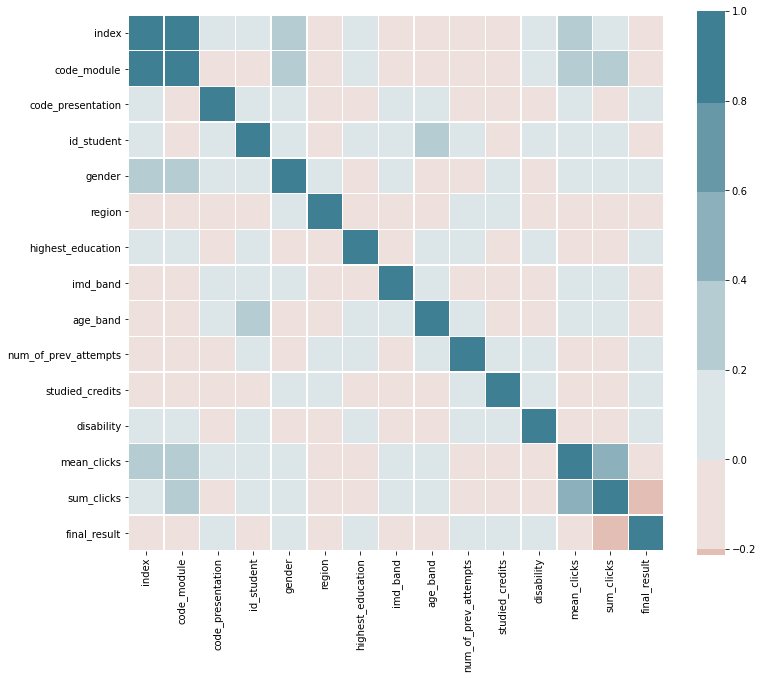

In [94]:
cor_mat = sns.heatmap(
    corr,
  center = 0,
    cmap = sns.diverging_palette(20,220, n = 10),
    square = True,
    linewidths = 0.5
)

The main predictors to look at here is 
- gender, region, highest_education, imd_band, age_band, num_of_prev_attempts, disability.
- But the main predictors in my opinion is the mean_clicks and sum_clicks.

These variables don't really have much correlation, but sum/mean clicks are close with final_results having a low correlation.

# 2 - Task B

This section will look at:
1. Using the new tables from Task A, use an unsupervised analysis on the groups or clusters found within the dataset.
2. Apply two types of algorithms to compare and interpret the results.

## 2.0 - Useful hints
It is not necessary that every interpretation has to be made with regards to a pre-determined
target variable in preparation of a supervised learning task. You may as well interpret the
results and uncover trends, and hidden groups which may not very well be linked to the final
result but can lead to other directions. <br><br>
To justify the decisions and choices you have made, it is vital to support and reflect on the
process of choosing final models’ parameters and evaluation metrics.


In [95]:
# shuffle the data to hopefully remove bias.
dfShuffle = sklearn.utils.shuffle(myTemp)

In [96]:
# our shuffled dataset
dfShuffle.head()

,index,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,mean_clicks,sum_clicks,final_result
1269,1269,1,0,486282,0,9,2,4,0,1,120,1,2.933333,264.0,1
31821,31821,6,2,2272474,0,12,0,7,1,0,30,0,3.225806,400.0,2
911,911,1,0,288380,0,9,2,5,0,3,120,1,1.636364,18.0,1
5766,5766,1,2,623169,0,1,2,9,0,0,120,0,2.848739,339.0,2
28723,28723,5,3,644450,1,1,2,4,0,0,60,0,4.294731,7825.0,0


In [97]:
# remove the warnings.
import warnings
warnings.filterwarnings('ignore')

# try with only x features
features = ['mean_clicks', 'sum_clicks', 'final_result']
# define the X of the subset
X = dfShuffle[features]
# set the standard scaller as z
z = ss()
# add the standard scores to X features.
X[features] = z.fit_transform(X)

## 2.1 - Gaussian Mixture
This section will look at using 2 unsupervised models on our dataset, and hopefully draw some more useful insights from the dataset. 
<br>Starting with the Gaussian Mixture which is a module from SciKit Learn and it is said to have a few pros and cons:
- Pros
 - Speed: It is the fastest algorithm for learning mixture models.
 - Agnostic: As this algorithm maximizes only the likelihood, it will not bias the means towards zero, or bias the cluster sizes to have specific structures that might or might not apply.
- Cons
 - Singularities: When one has insufficiently many points per mixture, estimating the covariance matrices becomes difficult, and the algorithm is known to diverge and find solutions with infinite likelihood unless one regularizes the covariances artificially.
 - Number of components: This algorithm will always use all the components it has access to, needing held-out data or information theoretical criteria to decide how many components to use in the absence of external cues.

https://scikit-learn.org/stable/modules/mixture.html




In [98]:
# set random state as myS
myS = 1234
# create a new GaussianMixture instance.
gm = GaussianMixture(n_components=3, random_state=myS)

In [99]:
# fit the Gaussian Mixture on the dataset dfShuffle
gm.fit(X)
# print the gm means
print(gm.means_)

[[ 0.83838786  0.94336532 -0.29701055]
 [-0.35957058 -0.41098061  0.67330785]
 [-0.49413035 -0.54144136 -1.06953196]]


In [100]:
# get the hard assignment of prediction
gmCluster = gm.predict(X)
print(gmCluster)

[2 1 2 ... 1 0 1]


In [101]:
# get the soft assignment of prediction
cluster_p = gm.predict_proba(X)
print(cluster_p)

[[1.67210452e-02 4.27639944e-04 9.82851315e-01]
 [6.79482650e-02 9.27568505e-01 4.48323043e-03]
 [8.72971132e-03 2.24048090e-04 9.91046241e-01]
 ...
 [4.07227476e-01 4.23728175e-01 1.69044349e-01]
 [9.08785226e-01 9.12147742e-02 1.88192701e-16]
 [3.00128575e-03 9.96998712e-01 2.43003346e-09]]


In [102]:
# get process_time module to check how long it takes for x amount of features.
from time import process_time

# start the time
t1_start = process_time()  

# print the silhouette score for GM model.
print("Silhouette:", round(silhouette_score(X, gmCluster), 2), '%')

# stop the timer
t1_stop = process_time()

# print in seconds.
print("Time to calculate silhouette score:", round(t1_stop-t1_start), 'seconds'  )

Silhouette: 0.3 %
Time to calculate silhouette score: 18 seconds


Above we can see the Silhouette score for the GM model, which is not great, but fine at 30%. 
<br>
Lets look at adding KMeans on the subset of data and see the difference.

## 2.2 - KMeans
This section will look at using a clustering model, specifically KMeans on the dataset. This again is part of the scikit learn package which is really useful. There are a few pros and cons to KMeans, these are as follows:
- Pros
 - Simple: Pretty easy to implement
 - Scalability: Works well with large datasets.
- Cons
 - Outliers: Centroids can be manipulated by outliers within the dataset.
 - Dependent on initial values: Can become difficult to find the the correct 'k' when looking at larger datasets and would require more advance versions of KMeans such as KMeans Seeding.

https://scikit-learn.org/stable/modules/clustering.html#k-means




In [103]:
# KMEANS on dfShuffle dataset
## kmeans for init
km_1 = KMeans(n_clusters=1, max_iter=20, verbose=0, random_state=myS).fit(dfShuffle)
km_2 = KMeans(n_clusters=2, max_iter=20, verbose=0, random_state=myS).fit(dfShuffle)
km_3 = KMeans(n_clusters=3, max_iter=20, verbose=0, random_state=myS).fit(dfShuffle)
km_4 = KMeans(n_clusters=4, max_iter=20, verbose=0, random_state=myS).fit(dfShuffle)
km_5 = KMeans(n_clusters=5, max_iter=20, verbose=0, random_state=myS).fit(dfShuffle)

In [104]:
# PRINT CENTERS
## print cluster centers
print(km_1.cluster_centers_)
print(km_2.cluster_centers_)
print(km_3.cluster_centers_)
print(km_4.cluster_centers_)
print(km_5.cluster_centers_)

[[1.64800720e+04 3.14630510e+00 1.78174913e+00 7.08880827e+05
  5.50543054e-01 5.96429332e+00 9.91765458e-01 4.27685100e+00
  3.02903386e-01 1.60005679e-01 7.80018812e+01 9.88854973e-02
  3.26187806e+00 1.32649922e+03 1.81536168e+00]]
[[1.65501293e+04 3.17432283e+00 1.79336290e+00 5.31598743e+05
  5.50174244e-01 5.97109140e+00 9.89822588e-01 4.24782195e+00
  2.62949469e-01 1.48621891e-01 7.78108665e+01 9.63488041e-02
  3.25738263e+00 1.29714522e+03 1.81462854e+00]
 [1.58746355e+04 2.90417522e+00 1.68138261e+00 2.24095721e+06
  5.53730322e-01 5.90554415e+00 1.00855578e+00 4.52772074e+00
  6.48186174e-01 2.58384668e-01 7.96526352e+01 1.20807666e-01
  3.30072767e+00 1.58017728e+03 1.82169747e+00]]
[[1.41789147e+04 2.89705882e+00 1.56657393e+00 2.73290467e+05
  5.48887122e-01 6.00119237e+00 9.69197138e-01 4.27027027e+00
  3.10015898e-01 3.51748808e-01 8.35174881e+01 1.05127186e-01
  3.18871925e+00 1.31960811e+03 1.82193959e+00]
 [1.58714526e+04 2.90283541e+00 1.68257261e+00 2.24960175e+06


In [105]:
# PRINT LABELS
# print init labels
print(km_1.labels_)
print(km_2.labels_)
print(km_3.labels_)
print(km_4.labels_)
print(km_5.labels_)

[0 0 0 ... 0 0 0]
[0 1 0 ... 0 0 0]
[2 1 0 ... 0 2 2]
[0 1 2 ... 2 0 0]
[0 1 4 ... 4 2 2]


In [106]:
# PRINT INERTIA
## print inertia for init
print(km_1.inertia_)
print(km_2.inertia_)
print(km_3.inertia_)
print(km_4.inertia_)
print(km_5.inertia_)

8638282045556997.0
985949104633262.6
565293214201013.5
270603022805292.34
202587248750850.84


Plot all of our KMeans, whilst looking for the 'elbow'.

In [107]:
# Create a list of our clusters
## for init dataset
fiveInertia = [km_1.inertia_, km_2.inertia_, km_3.inertia_, km_4.inertia_, km_5.inertia_]
# no of clusters
clusters = [1,2,3,4,5]

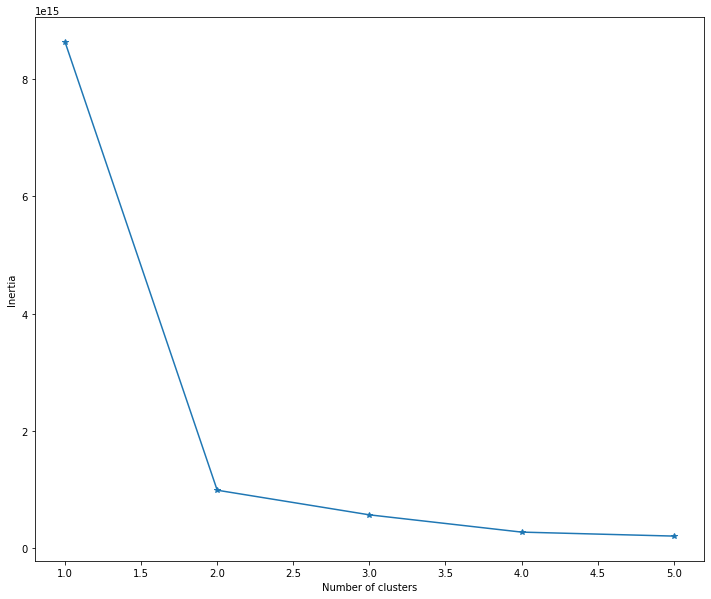

In [108]:
# Now to plot all of them to see the differences.
plt.plot(clusters, fiveInertia, marker = '*')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

From this plot above, it looks like the safest number of clusters from the original dataset is 2. This is usually show in the plot with the 'elbow' point within the plot.
<br>
Let's look at the silhouette score for these samples.

Create a new cluster which will be analysed with silhouettes samples. <br>
Here we will select 2 clusters which seemed to be the 'elbow' which was noted above.


In [109]:
# we'll use km_2
km_2
pred_km_2 = km_2.fit_predict(dfShuffle)

In [110]:
# can find the avg score using silhouette_score 
silSampK = silhouette_samples(dfShuffle, pred_km_2, metric = 'euclidean')
silScorK = silhouette_score(dfShuffle, pred_km_2, metric = 'euclidean')

In [111]:
print('silSamp:', silSampK) # score for each sample of different clusters

silSamp: [0.92363034 0.8277844  0.86323759 ... 0.85834941 0.92688139 0.93344773]


In [112]:
print('silScor:', round(silScorK,2), "%") # score for measuring the mean coefficient 

silScor: 0.89 %


Looking at the mean score of 89%, It looks like this model is pretty accurate. Why not compare this to a different clustering algorithm, lets try Mean Shift.

## 2.3 - Mean Shift
This section will look at using a Mean Shift algorithm to see how the silhouette score compares.

In [113]:
# The following bandwidth can be automatically detected using
bandwidth = estimate_bandwidth(X, quantile=0.2, n_samples=500)
# create a meanshift model
km_ms_2 = MeanShift(bandwidth=bandwidth, bin_seeding=True)
# fit the model on X
df = km_ms_2.fit(X)

In [114]:
kmMSLabels = df.labels_
kmMSLabels

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [115]:
kmMSCenters = df.cluster_centers_
kmMSCenters

array([[-3.80025775e-01, -3.72968377e-01,  2.57208019e-01],
       [ 2.27943094e+00,  7.44224786e+00, -1.97259735e+00],
       [ 2.59688823e+00,  8.11033381e+00,  2.00630575e-01],
       [ 6.46097972e+00,  1.43573340e+00, -2.82308963e-01],
       [ 6.78272267e+00, -6.26123518e-01,  1.28724454e+00],
       [ 8.24797876e+00, -2.57838183e-01,  1.10614221e+00],
       [ 6.39069762e+00,  3.52463811e+00,  3.81732902e-01],
       [ 3.39043855e+00,  1.01641533e+01,  2.00630575e-01],
       [ 9.90819988e+00,  2.23745632e-03,  1.28724454e+00],
       [ 1.27957905e+01,  1.26634144e-01, -8.85983385e-01],
       [ 1.36836211e+01,  5.68947117e+00,  2.00630575e-01],
       [ 1.05932016e+01,  4.04089896e+00,  2.00630575e-01],
       [ 9.30746670e+00, -7.48422149e-01, -8.85983385e-01],
       [ 6.39838460e+00,  6.46269530e+00,  1.28724454e+00],
       [ 4.00911633e+00,  1.33125858e+01,  2.00630575e-01]])

In [116]:
kmMSULab = np.unique(kmMSLabels)

In [117]:
n_clusters_ = len(kmMSULab)

In [118]:
print("number of estimated clusters : %d" % n_clusters_)

number of estimated clusters : 15


In [119]:
pred_ms_2 = df.fit_predict(dfShuffle)
pred_ms_2

array([27008,   719, 27323, ...,  8961, 10342, 18284], dtype=int64)

Seeing as i can't figure out plotting or silhouette scores, lets add their cluster labels to the original dataset.

In [120]:
# create a cluster group col
# dfShuffle['cluster_group'] = np.nan

In [121]:
# can find the avg score using silhouette_score 
#silSampMs = silhouette_score(dfShuffle, df.labels_, metric = 'euclidean')
#silScorMs = silhouette_score(dfShuffle, pred_km_2, metric = 'euclidean')

In [122]:
# print('silSampMs:', silSampMs)# score for each sample of different clusters

In [123]:
# print('silScorMs:', silScorMs) # score for measuring the mean coefficient 

In [124]:
# plot the clusters
# set fig size
# fig, ax = plt.subplots(figsize = (6,6))
# first cluster
#plt.scatter(x = df.iloc[df.index[df.labels_ == 0].tolist(), [0]],
#           y = df.iloc[df.index[df.labels_ == 0].tolist(), [1]],
#           c = 'green',
#           label = 'cluster 1')


#plt.legend()
#plt.xlabel('Eruption time in mins')
#plt.ylabel('Waiting time in mins to next eruption')
#plt.title('Clusters in geyser Dataset', fontweight = 'bold')

After attempting to do a mean shift algorithm on the data, i've managed to hit a road block with 2 things.

1 - calculating the silhouette scores.
<br>
2 -  plotting the clusters by groups.

Because of this, I have to give up and move on to the next step as I i'm running out of time.

This step looked at a few unsupervised models on the data, to see the accuracy of the models we calculated the scores with silhouette scores. Whilst a few of these areas would need to be explored further, for a first attempt, it will have to do.
<br> <br>
The next step will be to look at supervised learning models to try and predict a target variable (final_result).

# 3 - Task C

This section will look at:
1. Finding an optimal supervised learning model to predict a target variable (regression and classification) 

## 3.0 - Useful hints
Explore a variety of machine learning algorithms, ranging from probabilistic, tree based (ex:
CART, Random forest and etc) to advanced algorithms such as support vector machines.
<br> 
<br>
Using suitable evaluation measures, helps interpreting the models.
Linking the exploratory data analysis with feature importance can be a pretty impressive
way of concluding the coursework.
<br>
<br>
**Before** starting anything with supervised models, it is usually a good idea to split our dataset into what's known as test train split. This will be done below.

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html?highlight=test%20train#sklearn.model_selection.train_test_split

In [125]:
# lets choose everything except final result for X
X = dfShuffle.loc[:, dfShuffle.columns != 'final_result']
# now lets find just the final result as y
y = dfShuffle['final_result']
# now to set the train size for xy/Test/Train.
xTrain, xTest, yTrain, yTest = train_test_split(X, y, train_size = 0.75, random_state = myS)

## 3.1 - Linear Regression

This section will look at using supervised learning models on our dataset to find the likelihood of a students final result, and by doing so will have a better understanding of why some students withdraw from a course.
<br>
<br>
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

In [126]:
# set up an instance of LinearRegression as linReg.
linReg = LinearRegression().fit(xTrain, yTrain)

In [127]:
# check the coefficients
linReg.coef_

array([ 2.58486758e-05, -1.45368408e-01, -2.00749852e-02, -5.58361835e-09,
        9.30443450e-02, -1.13973382e-03,  3.48238266e-02, -9.37785662e-03,
        2.02097506e-02, -4.18665844e-02,  2.81755987e-03,  8.73089249e-02,
        3.14156922e-02, -1.27209154e-04])

In [128]:
# check the intercept
linReg.intercept_

1.685232912469481

In [129]:
linPred = linReg.predict(xTest)

In [130]:
print("Linear Regression Score", round(linReg.score(xTest, yTest), 2), "%")

Linear Regression Score 0.06 %


After setting up an instance of our Linear model, and looking at the coefficients and intercept we can now move on to measuring the performance of the said model.

In [131]:
# calculate the MSE
linReg_MSE = mean_squared_error(yTest, linPred)
linReg_MSE

0.7896408288709145

In [132]:
# calculate the MAE
linReg_MAE = mean_absolute_error(yTest, linPred)
linReg_MAE

0.7434658103891021

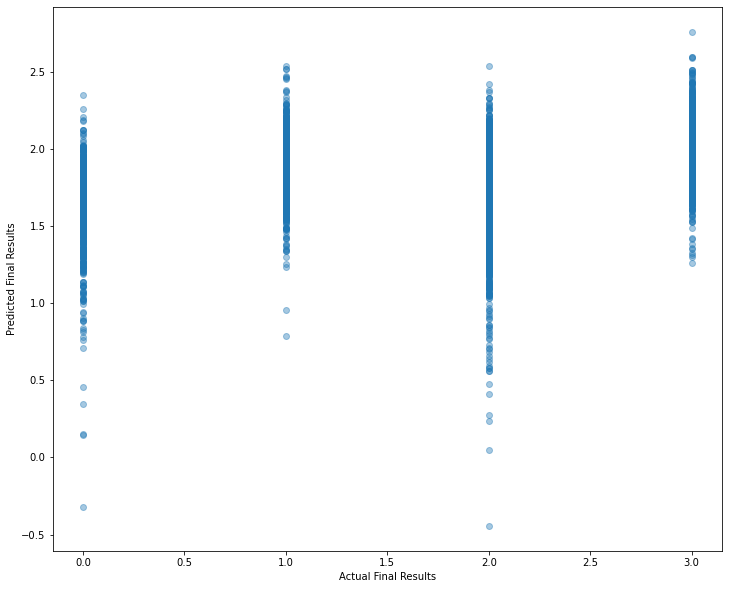

In [133]:
mpl.pyplot.scatter(x = yTest, y = linPred, alpha = 0.4)
mpl.pyplot.xlabel('Actual Final Results')
mpl.pyplot.ylabel('Predicted Final Results')
mpl.pyplot.show()

From looking at the scatter plot, it doesn't look like there is much to infer from this. It looks like the number of students within each final_result group. This being:

- Distinction
- Pass
- Fail
- Withdraw


Seeing as this doesn't show much information, lets try to use a Logistic Regression instead and see if that is more visually appealing ( and easier to understand on this dataset. )

## 3.2 - Logistic Regression

This section will look at the supervised learning model Logistic Regress on the dataset. This will hopefully give some insights into the number of students who are likely to withdraw from the a course.

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression

In [134]:
logReg = LogisticRegression(verbose = 1).fit(xTrain, yTrain)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s finished


In [135]:
lrPred = logReg.predict(xTest)

In [136]:
lrPred

array([3, 2, 3, ..., 2, 3, 2])

Next would be to calculate the accuracy of this model, this can be done by looking at a confusion matrix.

In [137]:
confusion_matrix(yTest, lrPred)
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html?highlight=confusion_matrix

array([[   9,   39,  598,   55],
       [   1,   95,  660,  867],
       [  46,  101, 2481,  345],
       [   2,   98,  478, 1169]], dtype=int64)

In [138]:
print('Accuracy score', round(accuracy_score(yTest, lrPred), 2),"%")
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html?highlight=accuracy_score

Accuracy score 0.53 %


In [139]:
#print('Binary AVG',     round(precision_score(yTest, lrPred, average='binary'),2),"%")
print('Macro AVG',      round(precision_score(yTest, lrPred, average='macro'),2),"%")
print('Micro AVG',      round(precision_score(yTest, lrPred, average='micro'),2),"%")
#print('Samples AVG',    round(precision_score(yTest, lrPred, average='samples'),2),"%")
print('Weighted AVG',   round(precision_score(yTest, lrPred, average='weighted'),2),"%")

Macro AVG 0.38 %
Micro AVG 0.53 %
Weighted AVG 0.45 %


In [140]:
#print('Binary Score',   round(recall_score(yTest, lrPred, average='binary'),2),"%")
print('Macro Score',    round(recall_score(yTest, lrPred, average='macro'),2),"%")
print('Micro Score',    round(recall_score(yTest, lrPred, average='micro'),2),"%")
#print('Samples Score',  round(recall_score(yTest, lrPred, average='samples'),2),"%")
print('Weighted Score', round(recall_score(yTest, lrPred, average='weighted'),2),"%")

Macro Score 0.39 %
Micro Score 0.53 %
Weighted Score 0.53 %


In [141]:
#print('Binary Score',   round(f1_score(yTest, lrPred, average='binary'),2),"%")
print('Macro Score',    round(f1_score(yTest, lrPred, average='macro'),2),"%")
print('Micro Score',    round(f1_score(yTest, lrPred, average='micro'),2),"%")
#print('Samples Score',  round(f1_score(yTest, lrPred, average='samples'),2),"%")
print('Weighted Score', round(f1_score(yTest, lrPred, average='weighted'),2),"%")

Macro Score 0.34 %
Micro Score 0.53 %
Weighted Score 0.45 %


For each part of the confusion matrix, we can see that the Micro average seems to give us the best results.
<br>
<br>
With the final score being 52 which is a decent enough score in my opinion - obviously for more sensitive areas you'd want a much higher accuracy (Self driving cars, Medicine).
**Before** accepting this as the best model, lets try one more model which will use Decision Trees and Random Forests to model this dataset.

In [142]:
# struggled to plot an ROC line for the logisitc regression.

## 3.3 - Decision Tree Classifier

This section will look at using supervised learning models on our dataset to find the likelihood of a students final result, and by doing so will have a better understanding of why some students withdraw from a course.
<br>
<br>
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

In [143]:
dt_of1 = DecisionTreeClassifier(criterion = 'entropy', random_state = myS) # one for entropy
dt_of2 = DecisionTreeClassifier(criterion = 'gini', random_state = myS) # one for gini

In [144]:
#dt = tree.DecisionTreeClassifier(criterion='gini')
dt1Train = dt_of1.fit(xTrain, yTrain)
dt2Train = dt_of2.fit(xTrain, yTrain)

train_pred1 = dt_of1.predict(xTrain)
train_pred2 = dt_of2.predict(xTrain)

test_pred1 = dt_of1.predict(xTest)
test_pred2 = dt_of2.predict(xTest)

In [145]:
print("Entropy Accuracy:", round(dt_of1.score(xTest, yTest),2), "%")
print("Gini Accuracy:", round(dt_of2.score(xTest, yTest),2),"%")

# print("Entropy Accuracy:{0:.3f}".format(metrics.accuracy_score(yTest, test_pred1)))
# print("Gini Accuracy:{0:.3f}".format(metrics.accuracy_score(yTest, test_pred2)))

Entropy Accuracy: 0.48 %
Gini Accuracy: 0.48 %


After running a decision tree with 2 different measurement function (Entropy & Gini) we can see that the Gini model was ever so slightly more accurate by a tiny bit. Whilst this might not have a significant affect on the model, lets assume higher is always better. 
<br> 
<br>
Now lets look at a decision tree but by restricting the parameters and see how it compares.

In [146]:
# decision tree restricted 1
dt_r1 = DecisionTreeClassifier(criterion = 'entropy',
                               random_state = myS,
                               max_depth = 4)
# decision tree restricted 2
dt_r2 = DecisionTreeClassifier(criterion = 'gini', 
                               random_state = myS,
                               max_depth = 4)

In [147]:
#dt = tree.DecisionTreeClassifier(criterion='gini')
dt_rf1_t = dt_r1.fit(xTrain, yTrain)
dt_rf2_t = dt_r2.fit(xTrain, yTrain)

train_pred_r1 = dt_r1.predict(xTrain)
train_pred_r2 = dt_r2.predict(xTrain)

test_pred_r1 = dt_r1.predict(xTest)
test_pred_r2 = dt_r2.predict(xTest)

In [148]:
print("Entropy Accuracy:",  round(dt_r1.score(xTest, yTest),2),"%")
print("Gini Accuracy:",     round(dt_r2.score(xTest, yTest),2),"%")

Entropy Accuracy: 0.58 %
Gini Accuracy: 0.57 %


After restricting the decision trees to a max depth of 4, here we can see the accuracy has gone up for both different types of dt models. Lets assume a restricted model would be better for predicting a students final_results and looking for the number of students who would withdraw. 

## 3.4 - Random Forest Classifier
This section will look at using a Random Forest Classifier to see to see how the accuracy compares to the decision trees above.

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html?highlight=random%20forest#sklearn.ensemble.RandomForestClassifier.predict

In [149]:
# import modules
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [150]:
# create instance of RFC
clf = RandomForestClassifier(max_depth=2, random_state=myS)
clf.fit(xTrain, yTrain)

RandomForestClassifier(max_depth=2, random_state=1234)

In [151]:
# get the hard assignment of prediction
rfcPred = clf.predict(X)
print(rfcPred)

[3 2 3 ... 2 2 3]


In [152]:
# get the soft assignment of prediction
rfcProb = clf.predict_proba(X)
print(rfcProb)

[[0.05317284 0.30639392 0.31303353 0.32739971]
 [0.10060196 0.25186199 0.38396589 0.26357016]
 [0.04015705 0.32737465 0.25047941 0.38198889]
 ...
 [0.09438923 0.23440085 0.44030386 0.23090606]
 [0.1388711  0.18218361 0.51091937 0.16802593]
 [0.04761817 0.3164597  0.23944246 0.39647966]]


In [153]:
print("RandomForestClassifier Score", round(clf.score(xTest, yTest),2),"%")

RandomForestClassifier Score 0.54 %


When looking at the accuracy score for our RFC, it looks decent enough around the 50% mark which could be seen as a good number. For this, lets assume this is good enough for our model. Let's also look at the feature importance before concluding.

In [154]:
print(clf.feature_importances_)

[3.48724047e-02 5.46210501e-02 1.07415775e-02 1.71215734e-03
 5.83469223e-03 2.47934632e-04 7.00400910e-02 2.01552595e-02
 3.01191263e-03 4.21980844e-02 9.21278054e-02 1.70461911e-04
 2.38820856e-01 4.25445712e-01]


To finish off, it would have been good to plot each of the accuracy scores which proved to be more difficult than I originally thought. So instead let's again look at the accuracy scores for each supervised model run here.

In [155]:
# Linear Regression
print("Linear Regression Score", round( linReg.score( xTest, yTest ), 2), "%")
# Logistic Regression
print('Logistic Regression Score', round(accuracy_score(yTest, lrPred), 2),"%")
# Decision Trees Classifier
print("DTC Entropy Accuracy:", round(dt_r1.score(xTest, yTest),2),"%")
# Random Forest Classifier
print("Random Forest Classifier Score", round( clf.score( xTest, yTest ), 2), "%")

Linear Regression Score 0.06 %
Logistic Regression Score 0.53 %
DTC Entropy Accuracy: 0.58 %
Random Forest Classifier Score 0.54 %


From the accuracy scores here, we can see Linear Regression has a very bad score, I have no idea why this is so much smaller but will assume I have done something wrong for LR. The best score here is Decision Trees Classifier which is 59%. 
<br>
<br>
Lets assume this would be the best model to calculate the student final results when looking at the amount of interactions the student has applied to the course.

# 4 - Conclusion

This section will be a small conclusion about the project.

## 4.1 - Reflection
After running through each of these different models, it was interesting to see how a lot of these models differed, whilst also giving a similar accuracy. This could either be seen as a good or a bad thing, but for a first attempt at such a big project like this for ML, I think it has turned out okay (not great, but okay).
<br><br>
I found this project to be the most difficult as of yet on the MSc Data Science course, followed shortly by Statistics as I last did statistics over 15+ years ago in school.
<br><br>
There is so much new stuff to learn around Machine Learning which I have found multiple books which go through this subject in depth, but I feel like with everything going on there isn't enough time for myself to even read about the subject before the coursework was due in.
<br><br>
Future work could improve upon the preprocessing of this project as that was such an overwhelming part of this project, followed by the unsupervised learning section. I feel like the supervised learning section was a lot easier to understand with the split test/training of the data. If the SciKit Learn package wasn't available I wouldn't have had a clue where to even begin with this project.
<br><br>
Luckily I wasn't limited with my computer as I recently upgraded my 5 year old PC several days after Christmas (from a 2 core cpu to an 8 core cpu) which really improved the speed of the models being run. My main limitations were my mental health and the feeling of being overwhelmed a lot during this project - mainly the EDA.

In [156]:
# After running through all of these models, 
# it's important for computers to free up the RAM 
# Some of these models had my PC using all 16GB of ram.
# This can be done with a command called Garbage Collector (gc), which is built within python.
# https://docs.python.org/3/library/gc.html

import gc
gc.collect()

4969

# 5 - References
## 5.1 - Software/Packages
Matplotlib: Hunter, J.D., 2007. Matplotlib: A 2D graphics environment. Computing in science &amp; engineering, 9(3), pp.90–95. 
<br><br>
Pandas: McKinney, W. & others, 2010. Data structures for statistical computing in python. In Proceedings of the 9th Python in Science Conference. pp. 51–56.
<br><br>
Seaborn: Waskom, M. et al., 2017. mwaskom/seaborn: v0.8.1 (September 2017), Zenodo. Available at: https://doi.org/10.5281/zenodo.883859.
<br><br>
Scikit-learn: Machine Learning in Python, Pedregosa et al., JMLR 12, pp. 2825-2830, 2011.

## 5.2 - Websites
Google Developers (2021) _k-Means Advantages and Disadvantages_ Available at: https://developers.google.com/machine-learning/clustering/algorithm/advantages-disadvantages (Accessed: 16/02/2021)
<br><br>
Python Programming Tutorials (2021) _Python Programming Tutorials_ Available at: https://pythonprogramming.net/ (Accessed 10/02/2021)
<br><br>
SciKit Learn (2021) _About Us_ Available at: https://scikit-learn.org/stable/about.html#citing-scikit-learn (Accessed 01/01/2021)
<br><br>
TutorialsPoint (2021) _Matplotlib Tutorial_ Available at: https://www.tutorialspoint.com/matplotlib/index.htm (Accessed 01/02/2021)